In [1]:
import os
import json
import warnings
import matplotlib.pyplot as plt
from itertools import zip_longest
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from util import (
    ticker_option, combine_dfs, get_stock_price, 
    prepare_ml_dataset, concatenate_strings, train_model,
    view_shap_value_for_instance
)

In [3]:
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.3f}'.format

In [4]:
use_cache = True

In [5]:
if os.path.exists('price.json') & use_cache:
    # Read the dictionary from the JSON file
    with open('price.json', 'r') as json_file:
        price_dict = json.load(json_file)
else:
    price_dict = {}

In [6]:
len(price_dict)

20

In [7]:
# for mean shap value
fig, axes = plt.subplots(2, 3, figsize=(30, 10), gridspec_kw={'hspace': 0.65, 'wspace': 0.65})
axes_flat = axes.flatten()
plt.close(fig)

In [8]:
# for mean shap value
# rows = 2
# cols = 3
# fig_width = 36  # Width of the figure in inches
# fig_height = fig_width * (rows / cols)

fig2, axes2 = plt.subplots(3, 2, figsize=(30, 10), gridspec_kw={'hspace': 1, 'wspace': 1})
axes_flat2 = axes2.flatten()
plt.close(fig2)

In [9]:
ticker_list = [
    "MSFT", "AAPL", "NVDA", "AMZN", "META", 
    "GOOGL", "GOOG", "BRK.B", "LLY", "AVGO", "JPM", 
    "XOM", "TSLA", "UNH", "V", "PG", "MA", "COST", "JNJ", "HD", "MRK",
]

In [10]:
df = combine_dfs(ticker_list, price_dict)
display(df)
df =  prepare_ml_dataset(df)
print(len(df))
display(df)
X_test, y_test, shap_values, X, shap_explainer, bm, other_outs = train_model(df, axes_flat[0], "Singular Model")
view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 0, axes_flat2[0], "Singular Model")

MSFT
AAPL
NVDA
AMZN
META
GOOGL
GOOG
BRK.B
No options found for BRK.B
LLY
AVGO
JPM
XOM
TSLA
UNH
V
PG
MA
COST
JNJ
HD
MRK


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,exp,days_to_exp,stockPrice,option_ticker
0,AMZN240621P01540000,2022-04-27,1540.000,138.000,114.500,130.500,0.000,0.000,1.000,1.000,0.000,True,REGULAR,USD,put,2024-06-21,785.210,138.170,AMZN
1,AMZN240621P01660000,2022-04-28,1660.000,84.300,145.000,161.000,0.000,0.000,3.000,2.000,0.000,True,REGULAR,USD,put,2024-06-21,784.290,144.600,AMZN
2,AMZN240621C01840000,2022-04-28,1840.000,1223.650,774.000,793.000,0.000,0.000,2.000,2.000,0.000,False,REGULAR,USD,call,2024-06-21,784.430,144.600,AMZN
3,AMZN240621C01640000,2022-04-29,1640.000,1114.450,904.000,922.000,0.000,0.000,2.000,2.000,0.000,False,REGULAR,USD,call,2024-06-21,783.390,124.280,AMZN
4,AMZN240621C01740000,2022-04-29,1740.000,998.000,838.000,856.000,0.000,0.000,1.000,1.000,0.000,False,REGULAR,USD,call,2024-06-21,783.180,124.280,AMZN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38611,AAPL240705C00225000,2024-06-07,225.000,0.140,0.160,0.180,-0.010,-6.667,79.000,336.000,0.258,False,REGULAR,USD,call,2024-07-05,27.210,196.890,AAPL
38612,AAPL240705C00230000,2024-06-07,230.000,0.110,0.110,0.120,0.010,10.000,18.000,486.000,0.274,False,REGULAR,USD,call,2024-07-05,27.220,196.890,AAPL
38613,AAPL240705C00235000,2024-06-07,235.000,0.080,0.080,0.100,0.010,14.286,55.000,79.000,0.297,False,REGULAR,USD,call,2024-07-05,27.170,196.890,AAPL
38614,AVGO251219C00630000,2024-06-07,630.000,813.110,794.000,812.000,18.400,2.315,1.000,41.000,0.502,True,REGULAR,USD,call,2025-12-19,559.280,1406.640,AVGO


22187


,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put,lastPrice
0,1540.000,0.000,0.000,1.000,1.000,0.000,1,785.210,138.170,0,1,138.000
1,1660.000,0.000,0.000,3.000,2.000,0.000,1,784.290,144.600,0,1,84.300
2,1840.000,0.000,0.000,2.000,2.000,0.000,0,784.430,144.600,1,0,1223.650
3,1640.000,0.000,0.000,2.000,2.000,0.000,0,783.390,124.280,1,0,1114.450
4,1740.000,0.000,0.000,1.000,1.000,0.000,0,783.180,124.280,1,0,998.000
...,...,...,...,...,...,...,...,...,...,...,...,...
22182,185.000,1.770,15.154,232.000,750.000,0.273,1,27.190,196.890,1,0,13.450
22183,1000.000,-3.850,-2.072,12.000,444.000,0.400,0,923.170,1208.880,0,1,182.000
22184,1050.000,4.170,2.084,4.000,95.000,0.396,0,923.170,1208.880,0,1,204.220
22185,630.000,18.400,2.315,1.000,41.000,0.502,1,559.280,1406.640,1,0,813.110


model    r2          mae            mse         
                                   train  test  train   test   train     test
0  GradientBoostingRegressor_4_250 0.982 0.969 19.489 23.153 900.382 1543.044

100%|===================| 5533/5547 [00:30<00:00]        

In [11]:
# save to json
with open('price.json', 'w') as json_file:
    json.dump(price_dict, json_file, indent=4)

In [12]:
other_outs_ = []

for ticker, ax_shap_sum, ax_shap_sum2 in zip_longest(ticker_list[0:5], axes_flat[1:], axes_flat2[1:]):
    if ticker == None:
        ax_shap_sum.axis('off')
        continue
    # print(ticker)
    df = combine_dfs([ticker], price_dict)
    df =  prepare_ml_dataset(df)
    print(len(df))

    X_test, y_test, shap_values, X, shap_explainer, bm, other_outs = train_model(df, ax_shap_sum, ticker)
    other_outs_.append(other_outs)
    view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 0, ax_shap_sum2, ticker)

MSFT
1463


model    r2         mae         mse       
                                   train  test train  test train   test
0  GradientBoostingRegressor_4_250 0.999 0.989 1.371 4.848 3.158 57.846

AAPL
824


model    r2         mae         mse       
                                   train  test train  test train   test
0  GradientBoostingRegressor_4_250 1.000 0.990 0.382 2.617 0.246 17.397

NVDA
5576


model    r2         mae            mse        
                                   train  test train   test   train    test
0  GradientBoostingRegressor_4_250 0.998 0.993 9.727 15.793 176.868 667.153

AMZN
1031


model    r2         mae          mse         
                                   train  test train   test train     test
0  GradientBoostingRegressor_4_200 1.000 0.914 1.801 20.455 7.039 4765.038

META
2247


model    r2         mae          mse        
                                   train  test train  test  train    test
0  GradientBoostingRegressor_4_250 0.999 0.992 2.637 6.936 11.957 119.220

In [13]:
df2 = pd.concat([t[0] for t in other_outs_])

In [14]:
df2['ticker'] = ticker_list[0:5]
df2.round(3)

model    r2         mae            mse           \
                                   train  test train   test   train     test   
0  GradientBoostingRegressor_4_250 0.999 0.989 1.371  4.848   3.158   57.846   
0  GradientBoostingRegressor_4_250 1.000 0.990 0.382  2.617   0.246   17.397   
0  GradientBoostingRegressor_4_250 0.998 0.993 9.727 15.793 176.868  667.153   
0  GradientBoostingRegressor_4_200 1.000 0.914 1.801 20.455   7.039 4765.038   
0  GradientBoostingRegressor_4_250 0.999 0.992 2.637  6.936  11.957  119.220   

  ticker  
          
0   MSFT  
0   AAPL  
0   NVDA  
0   AMZN  
0   META

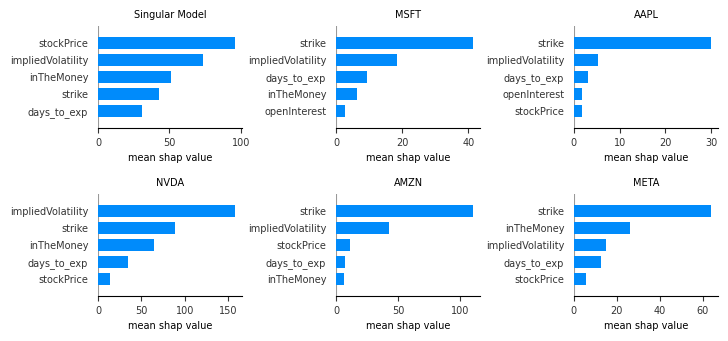

In [15]:
display(fig)

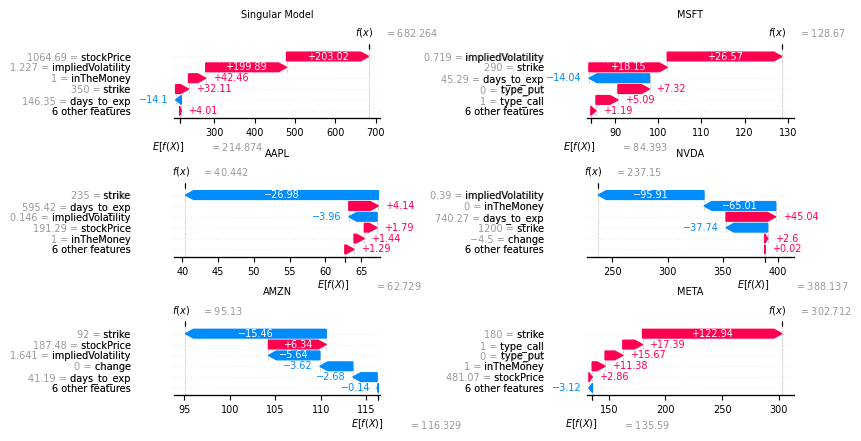

In [16]:
display(fig2)